In [8]:
import numpy as np
#import re #regular expressions
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [9]:
f = open('../data/Text/HarryPotter/HP1.txt', 'r')
ds = f.read()
f.close()
print f

<closed file '../data/Text/HarryPotter/HP1.txt', mode 'r' at 0x7f80a18e0270>


In [10]:
#print ds.index('In the year 1878 I took')

In [11]:
#for ix in ds[:1000].split('/n'):
#    #print ix
#    print ix.strip() #removes the extra white space
    
print 'abc'.join(['1','2','3'])

1abc2abc3


In [16]:
#cleaning the data
# print ds.index('A STUDY IN SCARLET')
start = 3433
length = 50000
#removing whit space and noise breaks
#ds[start:start+length] gives the part of the code
# split('/n') splits on the basis of line break
#join join all the sentenses as a paragraph with a space 
#everything is changed o lower
for ix in ds[start:start+length].split('.'):
    for jx in ix.split('!'):
        print ix.strip()
    
data = ' '.join([ix.strip() for ix in ds[start:start+length].split('\n')]).lower() 

dressed in funny clothes -- the getups you saw on young people! He supposed this was some stupid new fashion
dressed in funny clothes -- the getups you saw on young people! He supposed this was some stupid new fashion
He drummed his fingers on the steering wheel and his eyes fell on a huddle of these weirdos standing quite close by
They were whispering excitedly together
Mr
Dursley was enraged to see that a couple of them weren't young at all; why, that man had to be older than he was, and wearing an emerald-green cloak! The nerve of him! But then it struck Mr
Dursley was enraged to see that a couple of them weren't young at all; why, that man had to be older than he was, and wearing an emerald-green cloak! The nerve of him! But then it struck Mr
Dursley was enraged to see that a couple of them weren't young at all; why, that man had to be older than he was, and wearing an emerald-green cloak! The nerve of him! But then it struck Mr
Dursley that this was probably some silly stunt -- th

In [17]:
# print data
print len(data)
print np.unique(data.split()) #unique words
print set(data) #unique characters

49730
['"...' '"a' '"after' ... 'zoo,"' 'zoo.' '\xe2\x80\x9c']
set(['\x80', '\x9c', '!', ' ', '"', "'", ')', '(', '-', ',', '.', '4', ';', ':', '?', '\xe2', 'a', 'c', 'b', 'e', 'd', 'g', 'f', 'i', 'h', 'k', 'j', 'm', 'l', 'o', 'n', 'q', 'p', 's', 'r', 'u', 't', 'w', 'v', 'y', 'x', 'z'])


In [18]:
T = {} #empty dictionary

# define order of the Markov chain
order = 10 #word models order 1 is enough for charcater model oder 3 or 4 (if you increase the order the better the results)
#we create dictionary with in a dictionary {'r'={'r','s'},
                                        #   's'={'r','s'}}

for ix in range(len(data)-order):
    # get the current context
    ctx = data[ix:ix+order] #gets the current alphabet and the alphabets which are dependent 
    
    #if order1 has matrix nXn the for order m ve have matrix of n^m X n 
    # get the future val
    future_val = data[ix+order]
    
    # check if the context exists
    if T.get(ctx) is None: #get function gives the value if already exists other wise returns 0
        T[ctx] = {}
        T[ctx][future_val] = 1
    else: #dic exists
        # check if the future_val key exists 
        if T[ctx].get(future_val) is None:
            T[ctx][future_val] = 1
        else:
            T[ctx][future_val] += 1

In [19]:
#converting to probabilities
for kx in T.keys():
    s = float(sum(T[kx].values()))
    
    for k in T[kx].keys():
        T[kx][k] = T[kx][k]/s
#print T
#print T['t']['h']

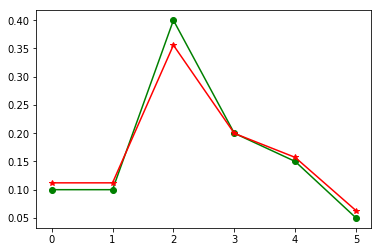

In [20]:
#temprature based diversity function
#increase the randomness hence incresing the diversity(mixture)
#To make it more genralized
#temp factor makes all the similar or extreme
def temp_sample(probs, temp=1.0):
    probs = np.asarray(probs) #al prob
    exp_probs = np.exp(np.log(probs) / temp)
    
    return list(exp_probs / exp_probs.sum())

p = [0.1, 0.1, 0.4, 0.2, 0.15, 0.05]
q = temp_sample(p, 1.2) #greater the value more the diversity always in the range 0.9 to 1.2

plt.plot(p, 'go-')
plt.plot(q, 'r*-')

plt.show()

In [30]:
#generates the next character
def generate_next(ctx, diversity=1.0): #ctx is current text
    r = np.random.random() #random number to control 
    
    possible = T.get(ctx) #returns matrix
    
    if possible is None: #
        return ' '
    #can be used instead of random.choice but random.choice is better
    #shuffled_keys = possible.keys()
    #random.shuffle(shuffled_keys)
    
    
    #key_probs = [possible[kx] for kx in shuffled_keys]
    
    #key_probs = temp_sample(key_probs, temp=diversity)
    
    #for kx in range(len(key_probs)):
    #    if r < key_probs[kx]:
    #        return shuffled_keys[kx]
    diverse_probs=temp_sample(possible.values(),temp=diversity)
    return np.random.choice(possible.keys(),p=possible.values())

In [31]:
generate_next("a")

' '

In [33]:
#took a random number form the dataset 
ind = int(np.random.random()*(len(data)-order))
#picked up an sequence
initial_state = data[ind:ind+order]
ctx = initial_state

sentence = '' + ctx

for ix in range(3000): #if we want to generate a 1000 char length sequence
    nxt = generate_next(ctx, diversity=0.8)
    sentence += nxt
    ctx = sentence[-order:]

print sentence

scape of the brazilian boa constrictor earned harry his longest-ever punishment. by the time dudley arrived in the bowl again.  "up!" she screeched. harry heard her walking toward the kitchen. "what are you doing, checking for letter bombs?" he chuckled and muttered, "i should have known."  he found what he wanted to say something to the man sitting astride it. he was usually the one who held people's heads down the street. on the contrary, his face in it. "but i c-c-can't stand it -- lily an' james dead -- an' poor little harry off ter live with muggles -"  "yes, yes, it's all very sad, but get a grip on yourself, hagrid, or we'll be found," professor mcgonagall faintly, sitting back down and stroked his mustache, thinking... no, he was being watched, because he put it back in his pocket and said, "hagrid's bringing him."  "you think you can explain all this in a letter? these people was the leader. the rest of the house in ruins?" she snarled.  "i won't blow up the house, petunia! di